In [ ]:
# A Notebook investigation the effect of different parameters on the light curve.

In [1]:
%matplotlib notebook
import batman
import numpy as np
import matplotlib.pyplot as plt


## Transit parameters

In [2]:
# a, P are chosen for a Solar density star

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 4.20                       #semi-major axis (in units of stellar radii)
params.inc = 88.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.1, 0.3]      #limb darkening coefficients
params.rp = 0.1

t = np.linspace(-0.075, 0.075, 5000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

## Variation with the exposure time

<IPython.core.display.Javascript object>


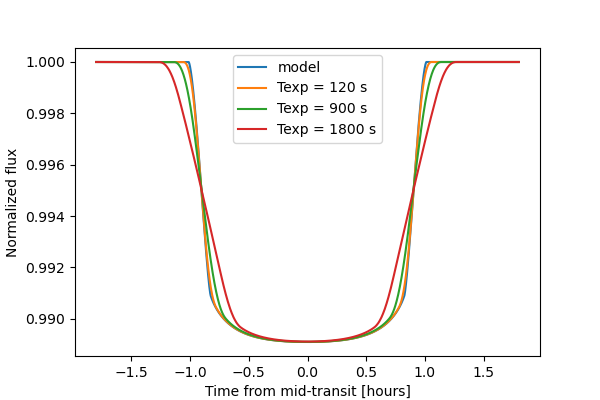

In [3]:
params.a = 4.2
params.inc = 90.
params.per = 1.
plt.figure(figsize=(6,4))

t_hours = t * 24


m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)              #calculates light curve
plt.plot(t_hours, flux, label = 'model')


m = batman.TransitModel(params, t, supersample_factor = 7, exp_time = 300/86400)    #initializes model
flux = m.light_curve(params)              #calculates light curve
plt.plot(t_hours, flux, label = 'Texp = 120 s')

m = batman.TransitModel(params, t, supersample_factor = 20, exp_time = 900/86400)    #initializes model
flux = m.light_curve(params)              #calculates light curve
plt.plot(t_hours, flux, label = 'Texp = 900 s')

m = batman.TransitModel(params, t, supersample_factor = 20, exp_time = 1800/86400)    #initializes model
flux = m.light_curve(params)              #calculates light curve
plt.plot(t_hours, flux, label = 'Texp = 1800 s')

plt.legend()
plt.xlabel('Time from mid-transit [hours]')
plt.ylabel('Normalized flux')
plt.show()


## Variation of the impact parameter

<IPython.core.display.Javascript object>


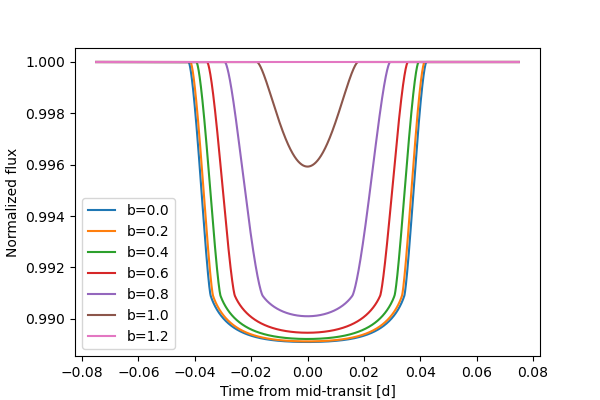

90.0
87.2705973632213
84.53497620009412
81.78678929826181
79.01942457238783
76.22585300197328
73.39845040097977


In [4]:
params.a = 4.2
params.inc = 90.
params.per = 1.          

m = batman.TransitModel(params, t)    #initializes model

plt.figure(figsize=(6,4))
b_range = np.arange(0., 1.25, 0.2)
for b in b_range:
        i = np.arccos(b / params.a ) /np.pi* 180
        print(i)
        params.inc = i                      #orbital inclination (in degrees)
        #m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = 'b={0:1.1f}'.format(b))
plt.legend()
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('Normalized flux')
plt.savefig('simulated_transit_b.png', dpi=300)
plt.show()


## Variation with the scaled semi-major axis

<IPython.core.display.Javascript object>


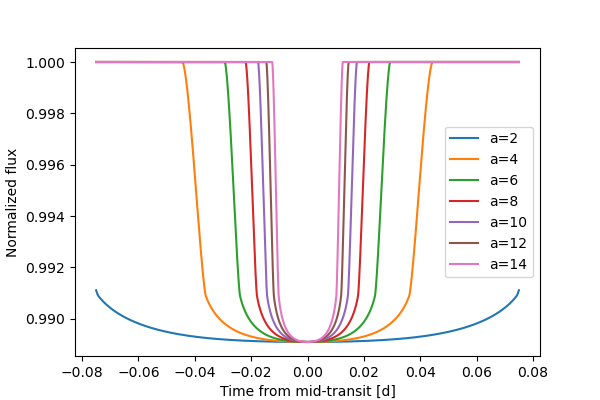

In [5]:
params.a = 4.2
params.inc = 90.
params.per = 1.                       #orbital period

m = batman.TransitModel(params, t)    #initializes model

plt.figure(figsize=(6,4))
a_range = np.arange(2, 16, 2)

for a in a_range:
        params.a = a                      #orbital inclination (in degrees)
        #m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = 'a={0:1.0f}'.format(a))
plt.legend()
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('Normalized flux')
plt.show()

## Variation with the scaled semi-major axis - keeping the stellar density constant

<IPython.core.display.Javascript object>


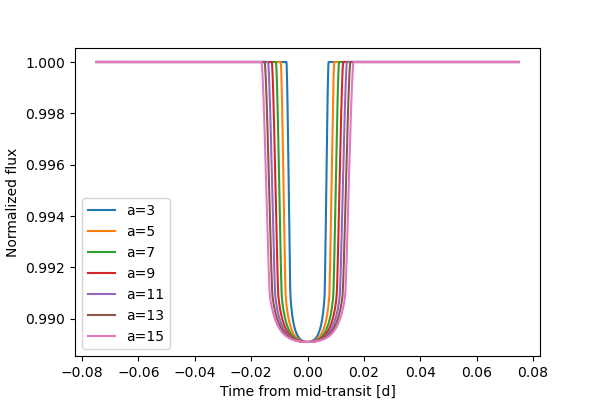

Period
0.12500
0.26896
0.44553
0.64952
0.87764
1.12757
1.39754


In [6]:
## NOTE: we have to change the period if we change the semi-major axis without changing the stellar density!
params.a = 4.2
params.inc = 90.
params.per = 1.          

m = batman.TransitModel(params, t)    #initializes model

plt.figure(figsize=(6,4))
a_range = np.arange(3, 16, 2)

print('Period')
for a in a_range:
        params.a = a                      #orbital inclination (in degrees)
        #orbital period:
        # a^3 / P^2 = a_1^3 / P_1^2 -> P_1^2 = a_1^3 * (P^2 / a^3)
        P = np.sqrt((1.**2 / 12.**3) * a**3)
        params.per = P
        print('{0:2.5f}'.format(P))
        #m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = 'a={0:1.0f}'.format(a))
plt.legend()
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('Normalized flux')
plt.savefig('simulated_transit_a.png', dpi=300)
plt.show()

## Variation of the density
### Note the increased period

In [7]:
#Definiton of constants
d2s = 86400.
Gsi = 6.67428e-11  # Gravitational Constant in SI system [m^3/kg/s^2]
Rsun = 696000. #  Sun radius in km
Msun = 1.9884e30 # Sun mass in kg
rho_Sun = Msun / (4./3.*np.pi* (Rsun*1000.)**3 )

def convert_rho_to_a(P, rho):

    return np.power(Gsi * (d2s * d2s) * (P**2)
                    * rho * rho_Sun / (3. * np.pi), 1./3.)

<IPython.core.display.Javascript object>


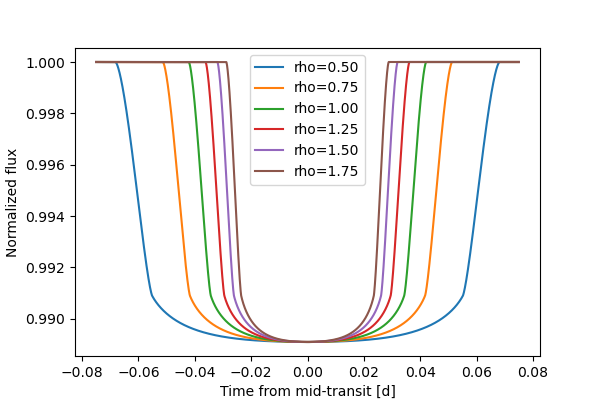

Semi-major axis
2.64990
3.47235
4.20645
4.88116
5.51201
6.10860


In [8]:
params.a = 4.2
params.inc = 90.
params.per = 1.

m = batman.TransitModel(params, t)    #initializes model

plt.figure(figsize=(6,4))
rho_range = np.arange(0.5, 2.00, 0.25)

print('Semi-major axis')
for rho in rho_range:
        params.a = convert_rho_to_a(rho, params.per)                      #orbital inclination (in degrees)
        print('{0:2.5f}'.format(params.a))
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = 'rho={0:1.2f}'.format(rho))
plt.legend()
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('Normalized flux')
plt.show()